In [715]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore all FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [716]:
# indices en la primera columna
datos_procesados = pd.read_csv('merged_data.csv', sep=',', encoding='utf-8', index_col=0)
datos_procesados.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,...,4.417802,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,...,4.433524,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,...,4.453689,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,...,4.464517,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,...,4.462960,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340


Media: 3332.6498554717023


Text(0.5, 1.0, 'Depressive disorder rates (number suffering per 100,000)')

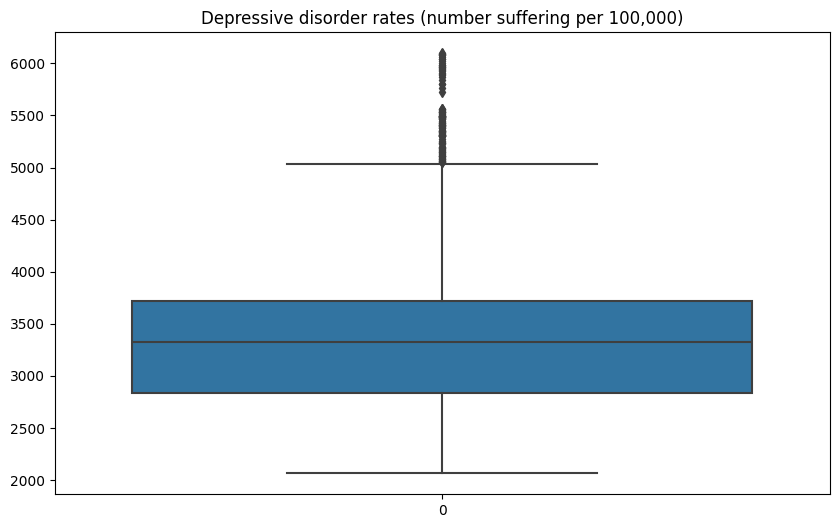

In [717]:
#sacar la media, hacer caja de bigotes de 'Depressive disorder rates (number suffering per 100,000)'

mean = datos_procesados['Depressive disorder rates (number suffering per 100,000)'].mean()
print (f'Media: {mean}')

plt.figure(figsize=(10, 6))
sns.boxplot(datos_procesados['Depressive disorder rates (number suffering per 100,000)'])
plt.title('Depressive disorder rates (number suffering per 100,000)')

In [718]:
umbral = 3300
datos_procesados['Depression_binary'] = np.where(datos_procesados['Depressive disorder rates (number suffering per 100,000)'] > umbral, 1, 0)
datos_procesados.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Depression_binary
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,...,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766,1
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,...,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682,1
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,...,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097,1
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,...,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657,1
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,...,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340,1


In [719]:
print(datos_procesados['Depression_binary'].value_counts())

Depression_binary
1    2854
0    2634
Name: count, dtype: int64


In [720]:
#standar scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_procesados_scaled = datos_procesados.copy()

# escalar todas las columnas, excepto entity, code y Depression_binary
datos_procesados_scaled.iloc[:, 3:-1] = scaler.fit_transform(datos_procesados.iloc[:, 3:-1])
datos_procesados_scaled.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Depression_binary
0,Afghanistan,AFG,1990,-1.134056,-0.116329,-0.857494,0.777161,1.912585,0.889303,-1.032458,...,0.567329,-0.016087,-0.616407,1.696335,0.475179,1.267015,0.255039,0.889303,0.989162,1
1,Afghanistan,AFG,1991,-1.139953,-0.115225,-0.873987,0.777964,1.929957,0.900767,-1.033196,...,0.551351,-0.033929,-0.622994,1.711550,0.470660,1.267862,0.263986,0.900767,0.951029,1
2,Afghanistan,AFG,1992,-1.144170,-0.114334,-0.890993,0.779170,1.951691,0.913909,-1.034500,...,0.525123,-0.088267,-0.633567,1.725920,0.450710,1.251850,0.281766,0.913909,0.883590,1
3,Afghanistan,AFG,1993,-1.146490,-0.113421,-0.906278,0.778954,1.976595,0.925569,-1.035551,...,0.523154,-0.129859,-0.639865,1.748381,0.433271,1.240693,0.302129,0.925569,0.859487,1
4,Afghanistan,AFG,1994,-1.146849,-0.112129,-0.918582,0.777684,2.000959,0.930618,-1.036106,...,0.507089,-0.174428,-0.646354,1.748179,0.439187,1.240169,0.310742,0.930618,0.885896,1


In [721]:
qualitative_columns = ['Entity', 'Code'] 

In [722]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

datos_procesados_ecoding = pd.get_dummies(datos_procesados_scaled, columns=qualitative_columns)
datos_procesados_ecoding

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),...,Code_VCT,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE
0,1990,-1.134056,-0.116329,-0.857494,0.777161,1.912585,0.889303,-1.032458,1.276138,0.610139,...,False,False,False,False,False,False,False,False,False,False
1,1991,-1.139953,-0.115225,-0.873987,0.777964,1.929957,0.900767,-1.033196,1.283324,0.619407,...,False,False,False,False,False,False,False,False,False,False
2,1992,-1.144170,-0.114334,-0.890993,0.779170,1.951691,0.913909,-1.034500,1.292321,0.626737,...,False,False,False,False,False,False,False,False,False,False
3,1993,-1.146490,-0.113421,-0.906278,0.778954,1.976595,0.925569,-1.035551,1.300507,0.634829,...,False,False,False,False,False,False,False,False,False,False
4,1994,-1.146849,-0.112129,-0.918582,0.777684,2.000959,0.930618,-1.036106,1.304401,0.639532,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,2013,-1.250498,-0.663037,-0.757626,-0.755094,-0.151982,-0.515591,-0.054105,-0.048224,-0.815246,...,False,False,False,False,False,False,False,False,False,True
5484,2014,-1.242808,-0.659276,-0.752273,-0.751750,-0.146011,-0.497580,-0.054303,-0.032082,-0.799442,...,False,False,False,False,False,False,False,False,False,True
5485,2015,-1.231557,-0.654695,-0.743208,-0.747587,-0.139465,-0.474623,-0.055137,-0.012055,-0.778885,...,False,False,False,False,False,False,False,False,False,True
5486,2016,-1.216181,-0.649388,-0.730323,-0.742646,-0.138394,-0.447194,-0.056857,0.006350,-0.751223,...,False,False,False,False,False,False,False,False,False,True


In [723]:
X = datos_procesados_ecoding.drop(columns=["Depression_binary", "Depressive disorder rates (number suffering per 100,000)"])
y = datos_procesados_ecoding["Depression_binary"]

In [724]:
from sklearn.model_selection import train_test_split

In [725]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size=0.30, random_state=0)

In [726]:
from sklearn.neighbors import KNeighborsClassifier

In [727]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [728]:
knn.fit(X_entreno, y_entreno)

KNeighborsClassifier(n_neighbors=4)

In [729]:
pred = knn.predict(X_prueba)

In [730]:
from sklearn.metrics import classification_report, confusion_matrix

In [731]:
print(confusion_matrix(y_prueba, pred))

[[783   1]
 [ 20 843]]


In [732]:
print(classification_report(y_prueba, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       784
           1       1.00      0.98      0.99       863

    accuracy                           0.99      1647
   macro avg       0.99      0.99      0.99      1647
weighted avg       0.99      0.99      0.99      1647



In [733]:
tasa_error = []

for i in range(1, 60):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_entreno, y_entreno)
    pred_i = knn.predict(X_prueba)
    tasa_error.append(np.mean(pred_i != y_prueba))

Text(0, 0.5, 'Tasa de Error')

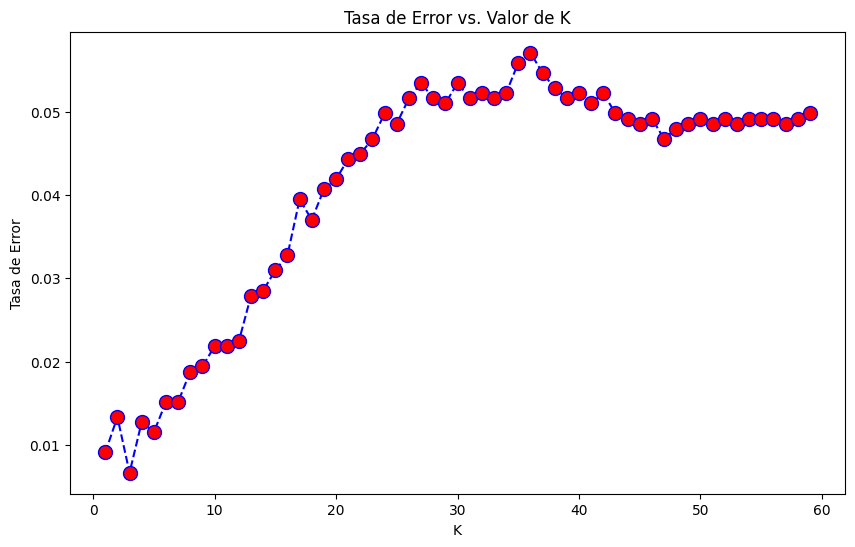

In [734]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 60), tasa_error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')